In [2]:
!wget https://www.learningcontainer.com/wp-content/uploads/2020/05/sample-mp4-file.mp4

--2020-06-18 11:03:59--  https://www.learningcontainer.com/wp-content/uploads/2020/05/sample-mp4-file.mp4
Resolving www.learningcontainer.com (www.learningcontainer.com)...104.27.173.148, 172.67.188.164, 104.27.172.148
Connecting to www.learningcontainer.com (www.learningcontainer.com)|104.27.173.148|:443... connected.
HTTP request sent, awaiting response...200 OK
Length: 10546620 (10M) [video/mp4]
Saving to: ‘sample-mp4-file.mp4’

sample-mp4-file.mp4 100%[===================>]  10.06M  10.6MB/s    in 0.9s    

2020-06-18 11:04:00 (10.6 MB/s) - ‘sample-mp4-file.mp4’ saved [10546620/10546620]



In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from spectogram import *
ims, fig = plotStft("sample-mp4-file.wav")


timebins:  70848
freqbins:  513


In [57]:
from fourier import *

In [58]:
import cv2

def read_video(filename):
  vidcap = cv2.VideoCapture(filename)
  success, image = vidcap.read()
  count = 0
  images = []
  while success:
    images.append(image)
    success, image = vidcap.read()
    count += 1

  return np.stack(images)

In [59]:
vid = read_video('sample-mp4-file.mp4')
vid = vid.mean(axis=-1) / 255
vid.shape

(1889, 240, 320)

In [60]:
def show_video(vid, m=2, n=5, s=4):
  plt.figure(figsize=(n * s, m * s))
  for i in range(m * n):
    plt.subplot(m, n, i + 1)
    plt.imshow(vid[3*i], cmap='gray') # skip 2 frames

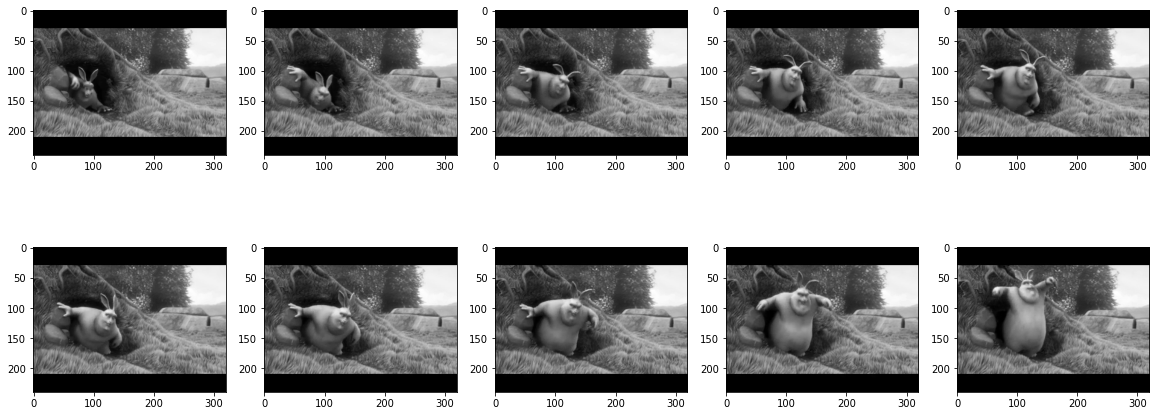

In [61]:
show_video(vid)

In [62]:
spects = []
for i in range(vid.shape[0]):
  img = vid[i]
  spect = getPoweSpectrum(img)
  spects.append(spect)

In [63]:
spects = np.stack(spects)
spects.shape

(1889, 198)

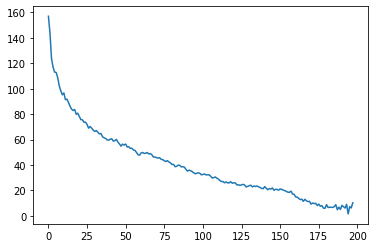

In [64]:
plt.plot(spects[0])

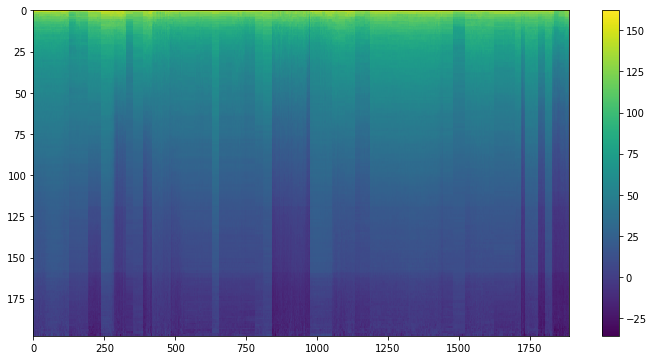

In [65]:
plt.figure(figsize=(12, 6))
plt.imshow(spects.transpose(), aspect='auto', interpolation='nearest')
plt.colorbar()

In [75]:
from moviepy.editor import *


Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)2670592/45929032 bytes (5.8%)6430720/45929032 bytes (14.0%)10362880/45929032 bytes (22.6%)14065664/45929032 bytes (30.6%)17809408/45929032 bytes (38.8%)21495808/45929032 bytes (46.8%)25346048/45929032 bytes (55.2%)29016064/45929032 bytes (63.2%)32899072/45929032 bytes (71.6%)36773888/45929032 bytes (80.1%)40566784/45929032 bytes (88.3%)44597248/45929032 bytes (97.1%)

In [79]:
videoclip = VideoFileClip("sample-mp4-file.mp4")

In [83]:
audio = videoclip.audio.to_soundarray()

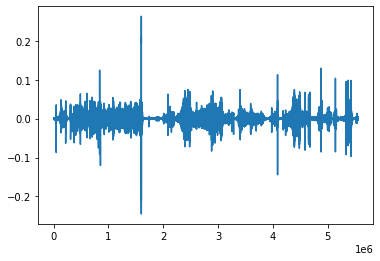

In [86]:
plt.plot(audio[:, 1])

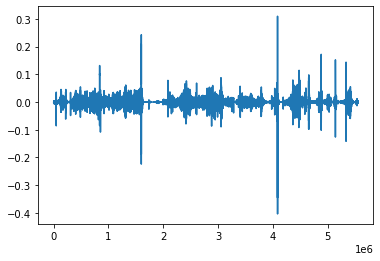

In [87]:
plt.plot(audio[:, 0])